<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inżynieria-lingwistyczna" data-toc-modified-id="Inżynieria-lingwistyczna-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inżynieria lingwistyczna</a></span></li><li><span><a href="#Zadanie-1---tokenizacja-(12-pkt)" data-toc-modified-id="Zadanie-1---tokenizacja-(12-pkt)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Zadanie 1 - tokenizacja (12 pkt)</a></span></li><li><span><a href="#Zadanie-2---klasyfikacja-(15-pkt)" data-toc-modified-id="Zadanie-2---klasyfikacja-(15-pkt)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Zadanie 2 - klasyfikacja (15 pkt)</a></span></li></ul></div>

# Inżynieria lingwistyczna
Ten notebook jest oceniany półautomatycznie. Nie twórz ani nie usuwaj komórek - struktura notebooka musi zostać zachowana. Odpowiedź wypełnij tam gdzie jest na to wskazane miejsce - odpowiedzi w innych miejscach nie będą sprawdzane (nie są widoczne dla sprawdzającego w systemie).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Zadanie 1 - tokenizacja (12 pkt)

Jedną z nowoczesnych technik tokenizacji jest BPE - byte-pair encoding [1]. Technika ta polega na podzielenie słów na częste podsłowa (morfemy). W przeciwieństwie do podejść lingwistycznych, wymagających reguł tworzenia morfemów, BPE wyznacza je automatycznie poprzez wyznaczenie najczęstszych przylegających do siebie sekwencji znaków które występują obok siebie.

Algorytm przebiega w następujących krokach.
1. Podziel wszystkie słowa na symbole (początkowo pojedyncze znaki)
2. Wyznacz najczęściej występującą obok siebie parę symboli 
3. Stwórz nowy symbol będący konkatenacją dwóch najczęstszych symboli.

Uwaga 1: każde słowo zakończone jest specjalnym symbolem końca wyrazu.

Uwaga 2: tworzenie nowego symbolu nie powoduje usuniecie starego tj. zawsze jednym z możliwych symboli jest pojedynczy znak, ale jeśli można to stosujemy symbol dłuższy.

Przykład: korpus w którym występuje ,,ala'' 5 razy i ,,mama 10 razy''
1. Dzielimy słowa na symbole ,,a l a END'' ,,m a m a END''  gdzie END jest symbolem końca wyrazu.
2. Najczęstsza para obok siebie to ,,m a'' (20) razy
3. Nowy symbol ,,ma''
4. Nowy podział ,,a l a END'' ,,ma ma END''
5. Najczęstsza para ,,ma ma'' (10) razy
6. Nowy symbol ,,mama''
7. Nowy podział ,,a l a END'' ,,mama END''
8. itd.

W pliku ,,brown_clusters.tsv'' pierwsza kolumna to identyfikator skupienia (nie używamy w tym zadaniu), druga kolumna to wyrazy, a trzecia to ich liczności w pewnym korpusie tweetów. Zaimplementuj technike BPE na tych słowach.

Zaimplementuj algorytm BPE wykonujący `number_of_iterations` iteracji (łączeń symboli).

[1] Sennrich, R., Haddow, B., and Birch, A. (2016). Neural machine translation of rare words with subword units. In ACL 2016.

In [9]:
import pandas as pd
import numpy as np
brown_df = pd.read_csv('brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])

number_of_iterations = 10
import math
def preform_bpe(brown_df, number_of_iterations):
    """
    Funckcja przyjmuje ramkę w formacie analogicznym do obiektu brown_df (wczytany wyżej)
     oraz liczbę iteracji.
    Wyjściem funkcji powinna być lista słów z poszczególnymi tokenami/symbolami oddzielonymi spacją.
    Za znak końca wyrazu przyjmij END. 
    """    
    # YOUR CODE HERE
    class Counter(dict):
         def __missing__(self, key):
            return 0
    
    last_word = ""
    # Deal with words interpeted as nan. The best option would be change pd.read_csv function, but i dunno how it will be tested. 
    brown_df["word"] = brown_df["word"].apply(lambda word: "nan" if isinstance(word, float) and math.isnan(word) else word)
    split_words = [list(word) + ["END"] for word in brown_df["word"] if not isinstance(word, float) or not math.isnan(word)]
    words_count = list(brown_df["count"])
    for i in range(number_of_iterations):
        pairs = Counter()
        # generate pairs
        for split_word, count in zip(split_words, words_count):
            for pair in zip(split_word[:-1], split_word[1:]):
                pairs[pair] += count
        biggest_pair = max(pairs, key=pairs.get)
#         print(i, biggest_pair)
        joined_biggest_pair = "".join(biggest_pair)
        new_split_words = []
        
        # generate new split words 
        for split_word in split_words:
            new_split_word = []
            matched_in_last_iteration = False
            for pair in zip(split_word[:-1], split_word[1:]):
                if pair == biggest_pair and not matched_in_last_iteration:
                    new_split_word.append(joined_biggest_pair)
                    matched_in_last_iteration = True
                    continue 
                elif not matched_in_last_iteration:
                    new_split_word.append(pair[0])
                matched_in_last_iteration = False
            if not matched_in_last_iteration:
                new_split_word.append(pair[1])
            new_split_words.append(new_split_word)
        split_words = new_split_words
    
    return [" ".join(split_word) for split_word in split_words]

Test implementacji:

In [10]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

Spraw aby Twoja implementacja wypisywała kolejne łączone ze sobą symbole i uruchom Twoją funkcję na np. 50 iteracji, obserwując jakie tokeny są tworzone.

In [3]:
preform_bpe(brown_df, 50)


0 ('e', 'END')
1 ('t', 'END')
2 ('s', 'END')
3 ('i', 'n')
4 ('t', 'h')
5 ('d', 'END')
6 ('y', 'END')
7 ('.', 'END')
8 ('o', 'END')
9 ('r', 'END')
10 ('a', 'n')
11 ('>', 'END')
12 ('o', 'n')
13 ('o', 'u')
14 ('g', 'END')
15 ('a', 'END')
16 ('l', 'END')
17 ('in', 'gEND')
18 ('<', '@')
19 ('<@', 'M')
20 ('<@M', 'E')
21 ('<@ME', 'N')
22 ('<@MEN', 'T')
23 ('<@MENT', 'I')
24 ('<@MENTI', 'O')
25 ('<@MENTIO', 'N')
26 ('<@MENTION', '>END')
27 ('r', 'e')
28 ('i', 'END')
29 ('th', 'eEND')
30 ('e', 'n')
31 ('o', 'm')
32 ('t', 'oEND')
33 (',', 'END')
34 ('!', 'END')
35 ('e', 'r')
36 ('h', 'a')
37 ('e', 'rEND')
38 ('i', 't')
39 (':', 'END')
40 ('y', 'ou')
41 ('a', 'r')
42 ('a', 'l')
43 ('o', 'r')
44 ('o', 'w')
45 ('.', '.END')
46 ('s', 't')
47 ('k', 'END')
48 ('i', 'sEND')
49 ('f', 'END')


- Jakie angielskie słowo jako pierwsze dostało swój własny token?

Odnosząc się do słów są to article a - 16 iteracja i the - 30 iteracja (to - 32 iteracja - jednakże może dotyczyć to tylko samych końcówek), jednakże token związany z zwróceniem się do kogoś w Tweecie (tj. <@MENTION>), została wygenerowany jeszcze wcześniej - 27 iteracja. Można też zauważyć że jeszcze szybciej tworzy się końcówka dla formy gerund (ing) - 18 iteracja.

- Jakie są zalety korzystania z tokenizacji BPE w kontekście tworzenia reprezentacji (problem OOV, odnieś się do  k-gramów i n-gramów)?

Tokenizacja BPE jest odporna na problem OOV, gdyż każde słowo można stworzyć z pojedyńczych znaków (które prawdopodobnie zostaną jako tokeny jeżeli liczba iteracji nie będzie zbyt duża), bądź ze zbitków znaków z innych tokenów.  

Kompresuje zbiór - jest to de facto zbiór kompresujący. 

Tokenizacja BPE przy n-gramach może mieć mniej sensu niż tokenizacja zwykła, jeżeli te n-gramy będą małe (unigramy, trigramy), gdyż przy normalnych 3-gramach bierzemy 3 słowa które razem już mogą mieć jakiś sens, w wypadku tokenizacji dla słów rzadkich, na jedno słow mogą skłądać się 3 zbitki liter - tokeny raz mogą być słowa o pełnym znaczeniu w innych wypadkach nie. 
Ale może to mieć pozytywne skutki, dla tego modelu, gdyż możemy zyskać np. na sensie stopniowania para tokenów przymiotnika z końcówkami "est" "er" może dać nam informacje o stopniu przymiotnika.

Wykorzystywanie tokenizacji (BPE i innych) nie ma sensu przy k-gramach, gdyż k-gramy biorą jako kontext k kolejnych znaków, a nie tokenów.



# Zadanie 2 - klasyfikacja (15 pkt)

Poniższy kod powinien wczytać i ztokenizować zbiór danych dot. analizy wydźwięku. Jeśli nie masz biblioteki `nltk` musisz ją zainstalować.

In [4]:
from helpers import DataSet
training_set = DataSet(['tweets.txt'])

Reading data set ['tweets.txt']


Poniżej znajdziesz przykład odczytu jednego tweeta z obiektu DataSet

In [5]:
for i in training_set.tweets:
    print(i.text)
    print(i.tokens)
    print(i.clazz)
    break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


Systemy IL często pracują z bardzo dużą liczbą cech, które są rzadkie np. cechy Bag-Of-Words, cechy n-gramowe itd. Powoduje to że klasyczna macierz przykłady uczące na cechy rośnie do bardzo dużych rozmiarów nawet dla małych zbiorów uczących (w sensie liczby przykładów). Ponadto samo przechowywanie w pamięci słownika mapującego konkretne słowa/n-gramy na indeksy kolumn macierzy może być bardzo kosztowne pamięciowo przy dużych rozmiarach słownika.

Istnieje jednak technika, która pozwala nam na ominięcie tej przeszkody: haszowanie cech. Opis tej techniki znajdziesz na stronie:  https://en.wikipedia.org/wiki/Feature_hashing Jest ona też implementowana w obiekcie `sklearn.feature_extraction.FeatureHasher`. Zapoznaj się z opisem techniki i wykonaj poniższe polecenia.

- Wykorzystując haszowanie cech wytrenuj wybrany klasyfikator na zbiorze uczącym dla cech Bag-of-words (możesz też spróbować cechy n-gramowe). Możesz wykorzystać gotową tokenizację we właściwości `.tokens`.

In [6]:
# YOUR CODE HERE
from sklearn.feature_extraction import FeatureHasher
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import random

TEST_SET_SPLIT = 0.2
n_features=100000
random.seed(10)
random.shuffle(training_set.tweets)

tokens_test = [tweet.tokens for tweet in training_set.tweets[:int(len(training_set.tweets) * TEST_SET_SPLIT)]]
y_test = [tweet.clazz for tweet in training_set.tweets[:int(len(training_set.tweets) * TEST_SET_SPLIT)]]
tokens_train = [tweet.tokens for tweet in training_set.tweets[int(len(training_set.tweets) * TEST_SET_SPLIT):]]
y_train = [tweet.clazz for tweet in training_set.tweets[int(len(training_set.tweets) * TEST_SET_SPLIT):]]


def fit_and_evaluate_model_fe(n_features, tokens_train, y_train, tokens_test, y_test):    
    fh = FeatureHasher(n_features=n_features, input_type="string")
    X_train = fh.transform(tokens_train)
    X_test = fh.transform(tokens_test)
    
    clf = SVC(kernel="linear")
    clf.fit(X_train, y_train)
    
    y_predict = clf.predict(X_test)
        
    acc = accuracy_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict, average="macro")
    return clf, acc, f1

clf, acc, f1 = fit_and_evaluate_model_fe(n_features, tokens_train, y_train, tokens_test, y_test)

- Stwórz wykres zależności wybranej miary klasyfikacji od wymiarów macierzy danych (chodzi o liczbę cech do których haszujemy cechy oryginalne). Wystarczy przetestować kilka (>=4) wybranych wartości na skali logarytmicznej.

Acc: 0.5059578368469294, f1: 0.22398052343274497
Acc: 0.5224564619615032, f1: 0.35716156406598637
Acc: 0.538038496791934, f1: 0.4723241376913461
Acc: 0.5334555453712191, f1: 0.4895176958055036
Acc: 0.5609532538955087, f1: 0.5127693955229952
Acc: 0.5609532538955087, f1: 0.5079923064238595


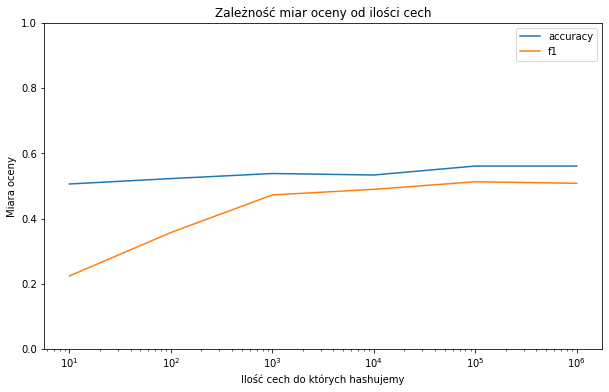

In [7]:
# YOUR CODE HERE
from matplotlib import pyplot as plt

def generate_plot(n_values):
    accs, f1s = [], []
    n_values = [10 ** n for n in n_values]
    for n in n_values:
        clf, acc, f1 = fit_and_evaluate_model_fe(n, tokens_train, y_train, tokens_test, y_test)
        print(f"Acc: {acc}, f1: {f1}")
        accs.append(acc) 
        f1s.append(f1)
        
    fig = plt.figure(figsize = [10, 6])
    ax = plt.subplot(111)
    ax.plot(n_values, accs, label="accuracy")
    ax.plot(n_values, f1s, label="f1")
    ax.set_ylim([0, 1])
    ax.set_xscale('log', basex=10)
    ax.legend()
    ax.set_title("Zależność miar oceny od ilości cech")
    ax.set_xlabel("Ilość cech do których hashujemy")
    ax.set_ylabel("Miara oceny")
    plt.show()
    
generate_plot(list(range(1, 7)))

 - Obserwując stworzony wykres - skomentuj. Jak dużo jakości klasyfikacji się traci (albo zyskuje?) korzystając z mniejszej liczby haszowanych cech? Często klasyfikatory bardzo dobrze działają nawet przy liczbie haszowanych cech dla których na pewno istnieją konflikty cech oryginalnych - jak myślisz dlaczego? (Pomyśl o interpretacji takich skonfliktowanych cech).

Jak można zauważyć trafność klasyfikatora jest przaktycznie nie różni się w zależności od liczby cech które hashujemy. Jednakże zmienia się miara f-score zmienia się już w zależności od liczby cech. Dla małej wartości przyjmuję ona mniejsze wartości (~0.22) i zwiększa się (do ok. 0.5) przy 1000 cech, później miara ta utrzymuje się na podobnej wartości. Hashowanie mniejszej ilości cech niż 10 nie ma sensu, gdyż traci się za dużo informacji z tekstu. Przy za dużej ilości może dojść do momentu gdy cech "featerów" będzie więcej niż słów unikalnych w tekście. Również przy zwiększaniu ilości cech traic się niewrażliwość na pomyłki  

Kalsyfikator działa dobrze nawet przy liczbie cech dla których na pewno istnieją konflikty cech oryginalnych, gdyż jest on wtedy odporny na pomyłki w słowie/literówki lub na słowa o podobnym znaczeniu (przy podobnej pisowni) - ponieważ będą miały one podobną wartość na wyjściu funkcji hashującej czyli będą tą samą cechą. 

 - W poprzednim zadaniu wczytałeś wynik grupowania Browna do pamięci. Wytrenuj klasyfikator na reprezentacji ,,Bag-of-clusters'' tj. w kolumnach zamiast słów/n-gramów będziesz miał grupy.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# YOUR CODE HERE
# brown_df["cluster"].value_counts()
# brown_df[brown_df["cluster"] == 10010]

word_to_cluster = {row['word']: row['cluster'] for _, row in brown_df.iterrows()}
def transform_tokens_to_clusters(tokens_dataset, vectorizer, training=True):
    clusters = []
    for tokens in tokens_dataset:
        clustered_tweet = []
        for token in tokens:
            try: 
                clustered_tweet.append(str(word_to_cluster[token]))
            except KeyError:
                pass
        clusters.append(" ".join(clustered_tweet))
    return vectorizer.fit_transform(clusters) if training else vectorizer.transform(clusters)


def fit_and_evaluate_model_boc(tokens_train, y_train, tokens_test, y_test):    
    vectorizer = CountVectorizer(preprocessor=None, lowercase=False)
    X_train = transform_tokens_to_clusters(tokens_train, vectorizer, True)
    X_test = transform_tokens_to_clusters(tokens_test, vectorizer, False)

    clf = SVC(kernel="linear")
    clf.fit(X_train, y_train)
    
    y_predict = clf.predict(X_test)

    acc = accuracy_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict, average="macro")
    return clf, acc, f1

clf, acc, f1 = fit_and_evaluate_model_boc(tokens_train, y_train, tokens_test, y_test)
print(f"Acc: {acc}, f1: {f1}")


Acc: 0.5545371219065078, f1: 0.4799110180034512


- Podsumuj eksperymenty: poznałeś dwie możliwości ograniczenia liczby cech - zastąpienie słów ich grupami i haszowanie cech. Jakie są wady i zalety obydwu podejść?

<table>
  <tr>
    <th></th>
    <th>Clustering</th>
    <th>Feature Hasher</th>
  </tr>
  <tr>
    <td>Zalety</td>
    <td>Można ustalić w pewien sposób jak dane słowa będą clustrowane - mamy w pewnym sensie wpływ na te clustry.<br><br>Złożoność obliczeniowa samego przyporządkowania słowo &gt; cluster jest niska.<br><br>Na poziomie jednego clustra słowa mogą mieć podobny sens lub podobną funkcję gramatyczną. <br><br></td>
    <td>Niewrażliwość na literówki przy odpowiedniej ilości feature'ów.<br><br>Nie trzeba używać dodatkowego słownika który przyporządkuje słowo do feature'a, czyli nie ma potrzeby tworzenia takowego na jakimś korpusie, dzięki czemu brak problemu ze słowami spoza korpusu<br><br>Złożoność obliczeniowa jest niska.<br></td>
  </tr>
  <tr>
    <td>Wady</td>
    <td>Uzyskanie grup może być czasochłonne. <br><br>Wrażliwy na literówki oraz problem ze słowami spoza korpusu. <br><br></td>
    <td>Cechy nie są interpretowalne w podobny sensie jak grupy.<br><br>Wrażliwy na literówki oraz problem ze słowami spoza korpusu. <br><br></td>
  </tr>
</table>